<a href="https://colab.research.google.com/github/kimyu-111/Algorithm-study/blob/main/chapter2_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter2: 데이터, 데이터, 또 데이터
### 여기서 살펴볼 내용
1. 균등 분포, Uniform Distribution 그려보기
2. Univariate & Bivariate normal distributions, 즉 가우시안 분포 그려보기
3. 키-몸무게 데이터 살펴보기
4. 가우시안 혼합 분포에 관해 살펴보기

### 1. 균등 분포의 확률 밀도 함수의 공식은 다음과 같다.
#### $$f(x)=\frac{1}{x_{max}-x_{min}} \text{ for } x_{min}<x<x_{max}$$ and zero otherwise.


Text(0.5, 1.0, 'The Uniform Distribution')

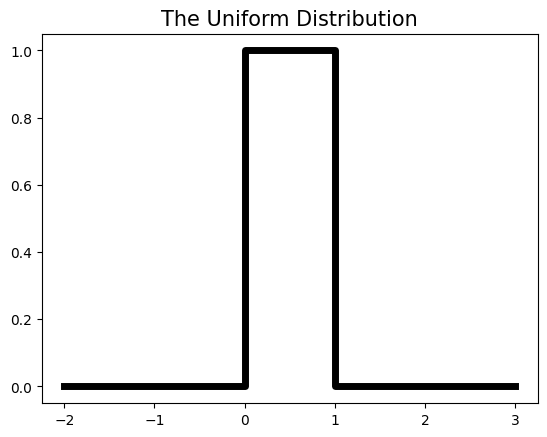

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt

# Uniform Distribution, 균등 분포
x_min=0
x_max=1

x = np.array([x_min-2, x_min+2, x_max-2, x_max+2])
y = np.array([0, 1/(x_max-x_min),1/(x_max-x_min),0])

plt.step(x, y, 'k', where='mid',linewidth=5)

plt.title('The Uniform Distribution', fontsize=15)
# plt.savefig("Fig_uniform.png")

### 2. 정규(가우스 분포라고도 함) 분포는 확률 밀도 함수에 대해 다음과 같은 공식을 사용합니다. 평균 $\mu$와 표준편차 $\sigma$라는 두 개의 매개 변수가 있다. 그리고 그 공식은 다음과 같다.

### $$g(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Text(0.5, 1.0, 'The Bell Shaped Univariate Normal Distribution')

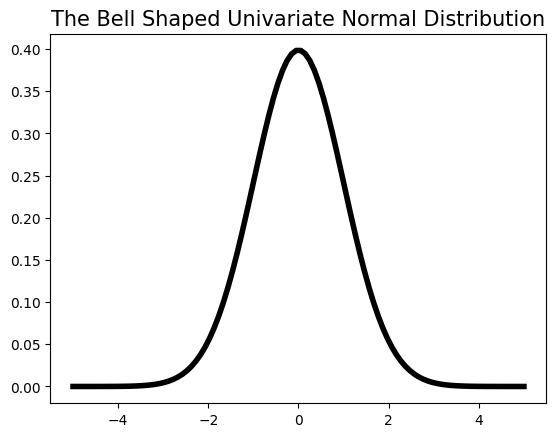

In [ ]:
# Univariate Normal Distribution
mu=0
sigma=1
x=np.linspace(-5,5,100)
y=np.exp(-0.5*(x-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))
# plot the data points
plt.plot(x,y,'k',linewidth=4)
plt.title('The Bell Shaped Univariate Normal Distribution',fontsize=15)
# plt.savefig("Fig_standard_normal.png")

### 3. 2차원 이변량 정규(가우스) 분포를 그려보자.
2차원에 대한 일반적인 공식은 [bivariate Gaussian distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) 다음과 같습니다.
$$g(x,y;\mu_1,\mu_2,\sigma_1,\sigma_2)=\frac{1}{\sqrt{(2\pi)^2\det\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}}}e^-\left\{{\frac{1}{2}\begin{pmatrix} x-\mu_1& y-\mu_2\end{pmatrix}\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}^{-1}\begin{pmatrix}x-\mu_1\\y-\mu_2\end{pmatrix}}\right\}$$

그리고 이 식은 다음과 같이 줄일 수 있습니다.
$$g(x,y;\mu_1,\mu_2,\sigma_1,\sigma_2)=\frac{1}{\sqrt{(2\pi)^2\det(\Sigma)}}e^-\left\{{\frac{1}{2}(u-\mu)^T\Sigma^{-1}(u-\mu)}\right\}$$

위 공식을 1차원 정규 분포 함수와 비교해보아요.
$$g(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- 랜덤 확률 변수가 하나만 있는 경우엔 평균과 표준편차도 하나뿐인 것을 확인할 수 있습니다.

- 랜덤 확률 변수가 두 개인 경우, 평균이 다음과 같이 두 개의 원소로 이루어지고 $\begin{pmatrix}\mu_1\\\mu_2\end{pmatrix}$, 표준편차도 마찬가지로 두 개로 이루어 집니디. $\begin{pmatrix}\sigma_1\\\sigma_2\end{pmatrix}$, 그리고 그 곱은 $\sigma^2$ 공분산 행렬과 그 행렬식으로 대체할 수 있습니다. $\Sigma=\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}$  여기서 $\rho$는 두 랜덤 확률 변수 간의 상관관계입니다.

다음 코드는 이변량 정규 분포를 그리는 코드입니다.

Text(0.5, 0.92, 'The Bivariate Normal Distribution')

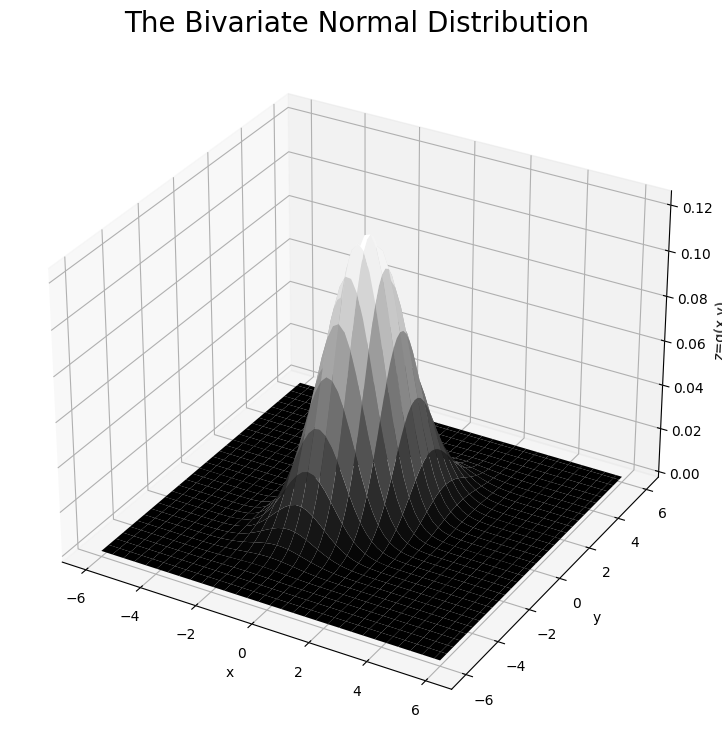

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

# 이변량 랜덤 확률 변수는 X, Y라고 합시다.
n = 60 # 축에서 각 점의 갯수
X = np.linspace(-6, 6, n)
Y = np.linspace(-6, 6, n)
X, Y = np.meshgrid(X, Y)
# 랜덤 변수 X와 Y를 3차원 배열로 쌓기
position = np.empty(X.shape + (2,)) # 이 텐서의 shape은 (60, 60, 2)가 됩니다.
position[:, :, 0] = X
position[:, :, 1] = Y

# 평균 벡터와 공분산 행렬
mu_1=0
mu_2=0
mu = np.array([mu_1, mu_2])
Sigma = np.array([[ 1 , 3/5], [3/5,  2]])

def multivariate_gaussian(position, mu, Sigma):

    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**2 * Sigma_det) # 정규화를 위한 상수
    fac = np.einsum('...k,kl,...l->...', position-mu, Sigma_inv, position-mu) # 아인슈타인 합
    return np.exp(-fac / 2) / N

# 변수 X, Y에 대한 분포가 위치 텐서로 쌓임
Z = multivariate_gaussian(position, mu, Sigma)

fig = plt.figure(figsize=(9,9))
picture = plt.axes(projection='3d')
picture.plot_surface(X, Y, Z, cmap='gist_gray')

picture.set_xlabel('x')
picture.set_ylabel('y')
picture.set_zlabel('z=g(x,y)')

picture.set_title('The Bivariate Normal Distribution', fontsize=20)

# plt.savefig("Fig_bivariate_normal.png")

### 4. 이제 이변량 정규 (가우스) 분포에서 n개의 점을 샘플링하고 seaborn 라이브러리르 사용하여 샘플링된 점을 x-y 평면에 플롯해보려고 한다. 그림을 보면 중앙에 가까운 점이 선택될 가능성이 높으며 멀어질수록 점점 줄어들 것이다.

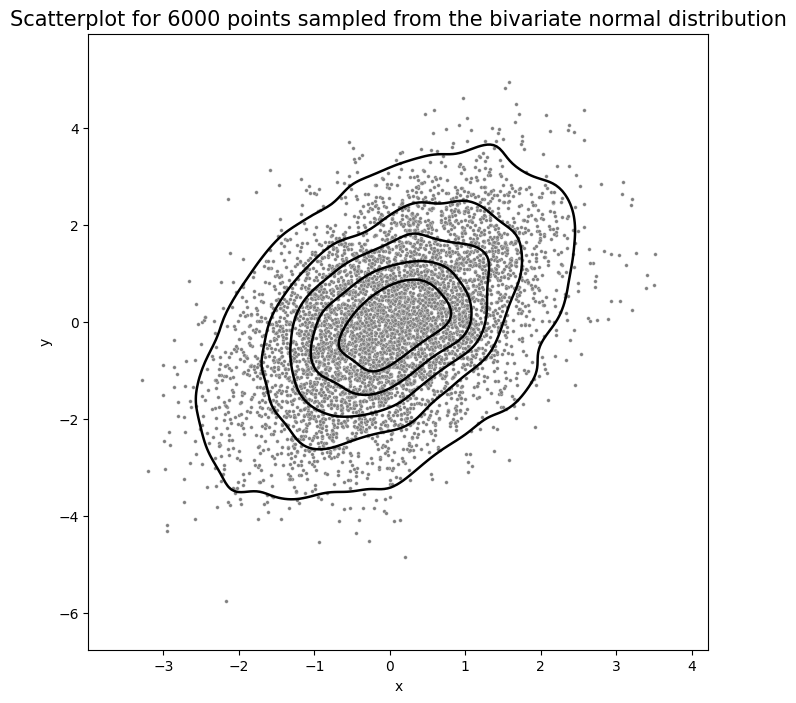

In [ ]:
import seaborn as sns  # 시본 라이브러리 불러오기

# 이변수 가우시안 분포로부터 데이터 시뮬레이션
n = 6000  # 데이터의 개수
mean = [0, 0]  # 평균
cov = [(1, 3/5), (3/5, 2)]  # 공분산

# 난수 생성
x, y = np.random.multivariate_normal(mean, cov, n).T

# 산점도와 밀도 윤곽선(density contours) 그리기
fig = plt.figure(figsize=(8,8))  # Figure 객체 생성, 크기 설정
sns.scatterplot(x=x, y=y, s=7, color="gray")  # 회색 산점도
sns.kdeplot(x=x, y=y, levels=6, color="k", linewidths=1.8)  # 밀도 윤곽선
# 축 라벨 설정
plt.xlabel('x')
plt.ylabel('y')
# 타이틀 설정
plt.title('Scatterplot for {} points sampled from the bivariate normal distribution'.format(n),fontsize=15)

# 그림 저장
plt.savefig("Fig_bivariate_normal_sampling.png")


### 캐글 데이터를 활용해 이 데이터의 분포가 정규분포가 맞는지 확인해보자.

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699

   Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


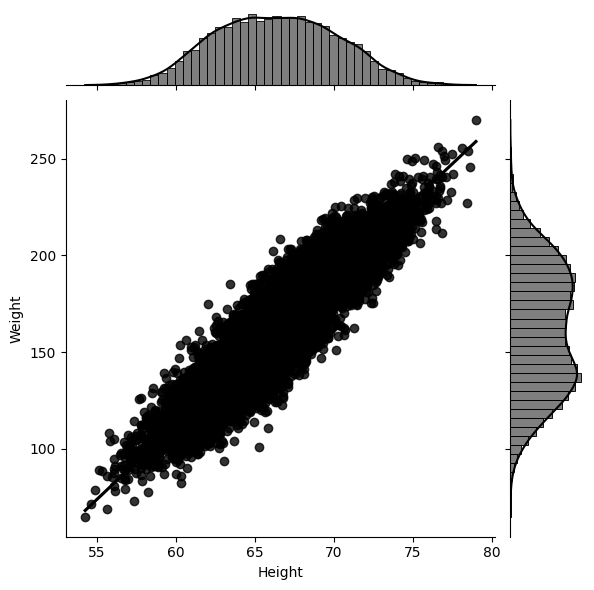

In [ ]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('data/weight-height.csv')

# 데이터 통계 요약
print(df.describe())  # 데이터의 평균, 최소값, 최대값, 표준편차 등을 보여줍니다.

# 데이터의 처음 몇 행 출력
print('\n', df.head())  # 데이터프레임의 처음 5행을 보여줍니다.

# 키와 체중의 관계 그래프 그리기
hw_plot = sns.jointplot(data=df, x='Height', y='Weight', kind='reg', color='k')  # 키와 체중의 공동 분포와 회귀선을 보여주는 그래프를 생성합니다.
